In [82]:

import pandas as pd
import sys
import pickle
sys.path.append("/Users/ryanharvey/github/tg_ripples/tg_ripples")
import functions
from matplotlib import pyplot as plt
import numpy as np

from tqdm import tqdm

import itertools

import seaborn as sns

In [83]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "svg.fonttype": 'none'
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)


%config InlineBackend.figure_format = 'retina'
fig_save_path = '/Volumes/Seagate Backup Plus Drive/Projects/ClarkP30_Recordings/analysis/figures/ripple_examples/'

In [84]:
csv_path = '/Volumes/Seagate Backup Plus Drive/Projects/ClarkP30_Recordings/analysis/swr_data/post_processed/swr_df.csv'
df = pd.read_csv(csv_path)
display(df)

csv_path = '/Volumes/Seagate Backup Plus Drive/Projects/ClarkP30_Recordings/analysis/swr_data/post_processed/df_ripple_rate.csv'
df2 = pd.read_csv(csv_path)
display(df2)

,Unnamed: 0,ripple_number,start_time,end_time,ripple_duration,peak_time,peak_channel,peak_amplitude,peak_freq,clipped,session,ep_type,group,rat
0,0,4,201.332394,201.366394,0.034000,201.351394,4,5.150545,122.931880,0.006667,ATN07_S20180918160054,ep_1,tg,ATN07
1,1,37,1249.616538,1249.689538,0.073000,1249.655538,4,4.094174,162.455893,0.000000,ATN07_S20180918160054,ep_3,tg,ATN07
2,2,57,1528.019700,1528.132700,0.113000,1528.053700,5,3.569597,131.126268,0.000000,ATN07_S20180918160054,ep_3,tg,ATN07
3,3,58,1581.596539,1581.788538,0.191999,1581.741538,4,9.663464,142.733218,0.006667,ATN07_S20180918160054,ep_3,tg,ATN07
4,4,82,2764.205267,2764.258267,0.053000,2764.234267,3,10.114827,119.693525,0.006667,ATN07_S20180918160054,1,tg,ATN07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5765,6041,12,1275.821997,1275.857996,0.036000,1275.841996,2,6.866176,132.811124,0.006667,ATN15_S20190425170132,ep_3,tg,ATN15
5766,6042,15,1372.227543,1372.310542,0.083000,1372.287543,3,8.187005,108.978288,0.013333,ATN15_S20190425170132,ep_3,tg,ATN15
5767,6043,17,2159.908836,2160.734833,0.825996,2160.520834,7,13.361331,113.397813,0.020000,ATN15_S20190425170132,1,tg,ATN15
5768,6044,18,2178.055751,2178.344750,0.288999,2178.217750,3,82.747517,103.436299,0.000000,ATN15_S20190425170132,1,tg,ATN15


,Unnamed: 0,session,counts,ripple_rate,group,rat
0,0,ATN07_S20180712182441,24,0.027726,tg,ATN07
1,1,ATN07_S20180713161814,8,0.005633,tg,ATN07
2,2,ATN07_S20180717141215,75,0.020775,tg,ATN07
3,3,ATN07_S20180723173344,69,0.024225,tg,ATN07
4,4,ATN07_S20180724171203,61,0.029175,tg,ATN07
...,...,...,...,...,...,...
74,74,ATN17_S20190820130416,218,0.202943,wt,ATN17
75,75,ATN17_S20190826120645,96,0.094149,wt,ATN17
76,76,ATN17_S20190906163739,77,0.059032,wt,ATN17
77,77,ATN17_S20190916163012,34,0.062978,wt,ATN17


In [85]:
df[df.rat == 'ATN08']

,Unnamed: 0,ripple_number,start_time,end_time,ripple_duration,peak_time,peak_channel,peak_amplitude,peak_freq,clipped,session,ep_type,group,rat
4184,4391,6,239.921600,240.004000,0.082400,239.968000,0,6.948970,124.730139,0.006667,ATN08_S20180707104750,ep_1,wt,ATN08
4185,4392,8,260.583200,260.666400,0.083200,260.614400,4,13.979520,129.878352,0.013333,ATN08_S20180707104750,ep_1,wt,ATN08
4186,4393,7,611.151200,611.187200,0.036000,611.169600,4,9.050590,133.735658,0.006667,ATN08_S20180713174646,ep_1,wt,ATN08
4187,4394,0,56.676000,56.835200,0.159200,56.700800,7,18.462927,139.128874,0.006667,ATN08_S20180719150119,ep_1,wt,ATN08
4188,4395,1,90.225600,90.336800,0.111200,90.256000,3,7.952713,95.501771,0.000000,ATN08_S20180719150119,ep_1,wt,ATN08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,4637,230,1886.462540,1886.619539,0.156999,1886.490540,3,14.853231,149.951766,0.000000,ATN08_S20181008164632,1,wt,ATN08
4424,4638,241,2067.041583,2067.183582,0.141999,2067.160582,6,5.324186,133.838995,0.000000,ATN08_S20181008164632,1,wt,ATN08
4425,4639,242,2069.187571,2069.261571,0.074000,2069.221571,6,4.918723,160.499611,0.000000,ATN08_S20181008164632,1,wt,ATN08
4426,4640,248,2358.389038,2358.498037,0.108999,2358.454038,6,14.207397,129.029423,0.000000,ATN08_S20181008164632,1,wt,ATN08


In [87]:
group_colors = {"wt": '#222629ff',
                'tg': '#ff5240ff',
                } 
def ecdf(x):
    xs = np.sort(x)
    ys = np.linspace(0,1,len(xs))
    return xs, ys


def plot_ecdf(var,df,ax,group_colors):
    for rat in pd.unique(df.rat):
        y = df[(df.rat == rat)]
        if y.empty == False:
            xs, ys = ecdf(y[var])
            ax.plot(xs,ys,color=group_colors[y.group.iloc[0]],linewidth=.5)

def plot_box(df,var,ax,group_colors,title=''):
    '''
    Function to overlay box plots to the right of my custom ecdf plots
    '''
    pos1 = ax.get_position()
    pos2 = [pos1.x0 + 0.13, pos1.y0+.01,  pos1.width / 2.5, pos1.height / 1.5] 
    ax3 = fig.add_axes(pos2)
    sns.set_palette(sns.color_palette([group_colors['wt'],group_colors['tg']]))
    g=sns.boxplot(x="group", y=var, data=df,
                width=.6,ax=ax3,saturation=1,fliersize=.5,order=['wt','tg'])
    ax3.axes.get_xaxis().set_ticks([])
    g.set(xlabel=None)
    g.set(ylabel=None)
    ax3.yaxis.set_minor_locator(AutoMinorLocator())
    ax3.spines["right"].set_visible(False)
    ax3.spines["left"].set_visible(False)
    ax3.spines["top"].set_visible(False)
    ax3.spines["bottom"].set_visible(False)
    ax3.set_title(title,fontsize=7)
    return ax3

In [88]:
fig_save_path = '/Volumes/Seagate Backup Plus Drive/Projects/ClarkP30_Recordings/analysis/figures/ripple_examples/'

<ipython-input-89-e5629b2fb737>:54: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(os.path.join(fig_save_path,'ripple_features.svg'),dpi=300,bbox_inches='tight')
/opt/anaconda3/envs/tg_ripples/lib/python3.9/site-packages/IPython/core/pylabtools.py:132: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


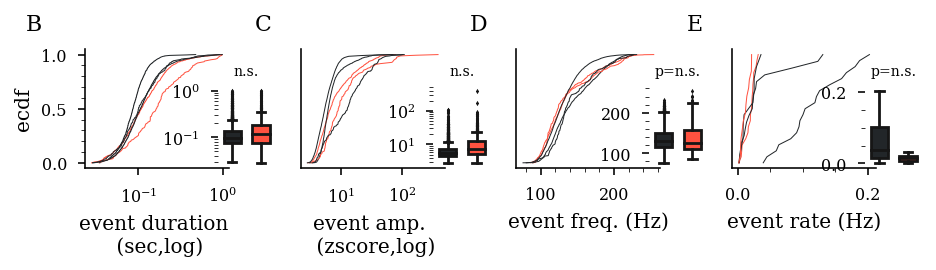

In [89]:
from matplotlib.ticker import AutoMinorLocator

fig, axs = plt.subplots(1,4, figsize=functions.set_size('thesis', fraction=1.2, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = .9, wspace=0.5)
axs = axs.ravel()

plot_ecdf('ripple_duration',df,axs[0],group_colors)
plot_ecdf('peak_amplitude',df,axs[1],group_colors)
plot_ecdf('peak_freq',df,axs[2],group_colors)
plot_ecdf('ripple_rate',df2,axs[3],group_colors)

axs[0].set_xscale('log')
axs[1].set_xscale('log')

axs[0].set_ylabel('ecdf')

axs[0].set_xlabel('event duration \n (sec,log)')
axs[1].set_xlabel('event amp. \n (zscore,log)')
axs[2].set_xlabel('event freq. (Hz)')
axs[3].set_xlabel('event rate (Hz)')

axs[1].axes.get_yaxis().set_ticks([])
axs[2].axes.get_yaxis().set_ticks([])
axs[3].axes.get_yaxis().set_ticks([])


for i in range(4):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())


ax0 = plot_box(df,"ripple_duration",axs[0],group_colors,title='n.s.')
ax1 = plot_box(df,"peak_amplitude",axs[1],group_colors,title='n.s.')
plot_box(df,"peak_freq",axs[2],group_colors,title='p=n.s.')
plot_box(df2,"ripple_rate",axs[3],group_colors,title='p=n.s.')

ax0.set_yscale('log')
ax1.set_yscale('log')


axs[0].text(-0.3, 1.3, 'B', transform=axs[0].transAxes,
            fontsize=11, fontweight='normal', va='top', ha='right')
axs[1].text(-0.2, 1.3, 'C', transform=axs[1].transAxes,
            fontsize=11, fontweight='normal', va='top', ha='right')
axs[2].text(-0.2, 1.3, 'D', transform=axs[2].transAxes,
            fontsize=11, fontweight='normal', va='top', ha='right')
axs[3].text(-0.2, 1.3, 'E', transform=axs[3].transAxes,
            fontsize=11, fontweight='normal', va='top', ha='right')

plt.savefig(os.path.join(fig_save_path,'ripple_features.svg'),dpi=300,bbox_inches='tight')
